In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics

pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)

In [2]:
xls = pd.ExcelFile('data/mental.xlsx')
df = pd.read_excel(xls, 'Data')

In [3]:
# convert low moderate high values to 1 2 3
def _convert(value):
    if value == 'low':
        return 0
    elif value == 'moderate':
        return 1
    elif value == 'high':
        return 2
    elif value == 'unc':
        return np.nan
    else:
        return value

for field in df.columns:
    df[field] = df[field].map(_convert)

In [4]:
# fill in missing values
df = df.fillna(df.mean())

/tmp/ipykernel_52606/3335149158.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [5]:
score_components = ['Fear_of_strangers', 'Fear_of_dogs', 'Fear_of_situations',
    'Fear', 'Aggression_toward_strangers', 'Aggression_toward_owner',
    'Aggression', 'Fear_of_thunder', 'Fear_of_fireworks', 'Fear_of_gunshot',
    'Noise_sensitivity', 'Fear_of_surfaces_and_heights',
    'Destroy_urinate_alone', 'Vocalize_salivate_pant_alone',
    'Separation_related_behaviour', 'Inattention_group',
    'Hyperactivity_impulsivity_group', 'Tail_chasing', 'Fly_snapping',
    'Surface_licking', 'Pacing', 'Staring', 'Excessive_drinking',
    'Self_biting', 'Compulsive_behaviour']

# sum over only the selected columns
df["score"] = -df[score_components].sum(axis=1)
df

,ID,Breed,Body_size,Age,Sex,Sterilisation,Weaningtime,Socialization_score,Family,Dogs,Experience,Daily_exercise,Activities_training,Alone,Urban_environment_score,Fear_of_strangers,Fear_of_dogs,Fear_of_situations,Fear,Aggression_toward_strangers,Aggression_toward_owner,Aggression,Fear_of_thunder,Fear_of_fireworks,Fear_of_gunshot,Noise_sensitivity,Fear_of_surfaces_and_heights,Destroy_urinate_alone,Vocalize_salivate_pant_alone,Separation_related_behaviour,Inattention,Inattention_group,Hyperactivity_impulsivity,Hyperactivity_impulsivity_group,Tail_chasing,Fly_snapping,Surface_licking,Pacing,Staring,Excessive_drinking,Self_biting,Compulsive_behaviour,score
0,1,rough_collie,large,9.000000,1.0,0.0,1.000000,17.00000,3.0,2.0,2.0,3.0,1.0,0.0,-2.017241e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.30163,0.393926,-0.385155,1.0,-0.840524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-4.695555
1,2,australian_kelpie,medium,2.500000,1.0,0.0,1.000000,26.00000,1.0,2.0,2.0,3.0,2.0,0.0,6.354630e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.30163,0.393926,-0.650053,1.0,-0.553108,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-5.695555
2,3,miniature_pinscher,small,4.000000,1.0,1.0,2.000000,18.00000,2.0,2.0,2.0,2.0,2.0,2.0,1.080999e-01,2.0,2.0,2.0,2.0,2.0,0.0,2.0,0.0,0.0,2.000000,2.000000,2.000000,0.000000,0.00000,0.000000,0.781369,2.0,1.624672,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-22.000000
3,4,other_breed,large,6.000000,2.0,0.0,4.000000,22.00000,1.0,2.0,2.0,4.0,1.0,3.0,-6.922639e-01,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,2.176561,2.0,-0.532651,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-9.000000
4,5,rough_collie,large,8.000000,1.0,0.0,1.000000,17.00000,3.0,2.0,2.0,3.0,1.0,0.0,-2.017241e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.30163,0.393926,-1.347222,0.0,-0.750546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-2.695555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13710,13711,bernese_mountain_dog,large,4.728613,2.0,1.0,3.000000,21.00000,2.0,2.0,1.0,1.0,1.0,0.0,-9.439048e-13,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.475118,0.984767,1.103927,0.000000,0.30163,0.393926,0.149271,1.0,-1.114681,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,-12.259367
13711,13712,medium_size_spitz,small,12.415038,2.0,1.0,2.760328,22.00000,1.0,2.0,1.0,3.0,2.0,1.0,1.751726e-01,0.0,2.0,0.0,2.0,0.0,0.0,2.0,2.0,2.0,0.475118,2.000000,0.000000,0.298742,0.30163,0.393926,1.091320,2.0,0.494915,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-16.469415
13712,13713,mixed_breed,NaN,2.245236,2.0,0.0,4.000000,26.00000,1.0,2.0,2.0,3.0,2.0,1.0,1.688393e+00,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.000000,2.000000,1.000000,0.298742,0.30163,0.393926,0.081587,1.0,-0.418765,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-12.994297
13713,13714,border_collie,large,5.563809,1.0,0.0,2.000000,21.72014,1.0,1.0,2.0,4.0,2.0,3.0,-5.243963e-01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-0.407417,1.0,-0.875986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.000000


In [6]:
# perform PCA on score components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df[score_components])

# perform ICA
from sklearn.decomposition import FastICA

ica = FastICA(n_components=2)
ica.fit(df[score_components])

/home/filip/.local/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


FastICA(n_components=2)

In [7]:
ica.components_

array([[ 4.57990992e-04,  3.63376392e-04, -9.02017999e-05,
         3.85863953e-04,  2.56423237e-04, -8.80964702e-05,
         7.47397306e-05, -2.98664363e-03, -3.91832558e-03,
        -2.14407805e-03, -3.82810065e-03, -2.59769189e-04,
         1.45038217e-04,  7.73284565e-05,  1.35442786e-04,
        -1.01891521e-06,  5.16685351e-05, -1.10422752e-05,
        -6.06862803e-05, -2.02657121e-05,  1.94223536e-05,
        -2.13699071e-05,  1.40920877e-07, -6.42293056e-05,
        -4.51984832e-05],
       [ 2.46680369e-03,  2.54186469e-03,  1.85969866e-03,
         3.49142961e-03,  1.31486366e-03,  9.47915068e-04,
         1.78177489e-03, -2.63921511e-04, -4.49102499e-04,
        -3.07452125e-04, -3.87416968e-04,  6.37775045e-04,
         7.90368960e-04,  7.70659047e-04,  8.87130057e-04,
         1.12420435e-03,  1.32901955e-03,  2.41896146e-04,
         1.66429138e-04,  5.21434032e-04,  2.67525160e-04,
         2.15802755e-04,  3.01733013e-04,  7.92819071e-04,
         1.10411726e-03]])

In [8]:
# pca.components_
for i, comp_name in enumerate(score_components):
    # print(f"{comp_name:33} {pca.components_[0][i]:5.2f}  {pca.components_[1][i]:5.2f}")
    print(f"{comp_name:33} {1000*ica.components_[0][i]:5.2f}  {1000*ica.components_[1][i]:5.2f}")

Fear_of_strangers                  0.46   2.47
Fear_of_dogs                       0.36   2.54
Fear_of_situations                -0.09   1.86
Fear                               0.39   3.49
Aggression_toward_strangers        0.26   1.31
Aggression_toward_owner           -0.09   0.95
Aggression                         0.07   1.78
Fear_of_thunder                   -2.99  -0.26
Fear_of_fireworks                 -3.92  -0.45
Fear_of_gunshot                   -2.14  -0.31
Noise_sensitivity                 -3.83  -0.39
Fear_of_surfaces_and_heights      -0.26   0.64
Destroy_urinate_alone              0.15   0.79
Vocalize_salivate_pant_alone       0.08   0.77
Separation_related_behaviour       0.14   0.89
Inattention_group                 -0.00   1.12
Hyperactivity_impulsivity_group    0.05   1.33
Tail_chasing                      -0.01   0.24
Fly_snapping                      -0.06   0.17
Surface_licking                   -0.02   0.52
Pacing                             0.02   0.27
Staring      

In [9]:
# one-hot encodings of breeds for linear regression
breeds = list(df["Breed"].unique())

for breed in breeds:
    df[breed] = (df["Breed"] == breed)    

/tmp/ipykernel_52606/727147647.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[breed] = (df["Breed"] == breed)
/tmp/ipykernel_52606/727147647.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[breed] = (df["Breed"] == breed)
/tmp/ipykernel_52606/727147647.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

In [10]:
# use linear regression to predict scores
env_predictors = ["Age", "Sex", "Sterilisation", "Weaningtime", "Socialization_score", "Family", "Dogs", "Experience", "Daily_exercise", "Activities_training", "Alone", "Urban_environment_score"]
predictors = env_predictors + breeds
# predictors = breeds
# predictors = env_predictors

# create linear regression object
reg = linear_model.LinearRegression(fit_intercept=False)
  
# train the model using the training sets
# reg.fit(df[predictors], df["score"])
reg.fit(df[predictors], df["score"])

LinearRegression(fit_intercept=False)

In [11]:
coefs = dict()
for pred, coef in zip(predictors, reg.coef_):
    coefs[pred] = coef

coefs = [(pred, coef) for pred, coef in coefs.items() if pred in breeds]
coefs.sort(key=lambda x: x[1])

avg_wb = np.mean([wb for breed, wb in coefs])

for breed, wellbeing in coefs:
    print(f"{breed:30} {wellbeing - avg_wb:.2f}")

lhasa apso                     -5.72
miniature_spitz                -4.17
welsh_springer_spaniel         -3.69
mixed_breed                    -2.82
kooikerhondje                  -2.79
japanese_spitz                 -2.68
finnish_hound                  -2.41
swedish_vallhund               -2.38
pinscher                       -2.36
finnish_spitz                  -2.00
medium_size_spitz              -1.98
havanese                       -1.94
longhaired_miniature_dachshund -1.89
parson_russell_terrier         -1.69
miniature_pinscher             -1.64
saluki                         -1.64
chinese_crested_dog            -1.64
beauceron                      -1.62
pomeranian                     -1.49
belgian_shepherd_tervueren     -1.49
brazilian_terrier              -1.42
coton_de_tulear                -1.36
cairn_terrier                  -1.24
belgian_shepherd_groenendael   -1.22
jack_russell_terrier           -1.08
bearded_collie                 -0.99
tibetan_spaniel                -0.83
k

In [12]:
df_masked = df.copy()
for breed in breeds:
    df_masked[breed] = False

In [13]:
df["predicted_score"] = reg.predict(df_masked[predictors])
# df["predicted_score"] = reg.predict(df[predictors])
df["unexpected_score"] = df["score"] - df["predicted_score"]
df["unexpected_score"] -= np.mean(df["unexpected_score"])

In [14]:
n = 40
# choose n most popular dog breeds
df2 = df[df['Breed'].isin(df['Breed'].value_counts().index[:n])]

# df2.groupby('Breed').mean().sort_values('score')
bf = pd.DataFrame()
bf["count"] = df2.groupby("Breed").size()

bf["unexpected_scores"] = df2.groupby('Breed').mean()["unexpected_score"]
bf["unexpected_score_stds"] = df2.groupby("Breed").std()["unexpected_score"]
bf["unexpected_score_sems"] = df2.groupby("Breed").sem()["unexpected_score"]

bf["scores"] = df2.groupby('Breed').mean()["score"]
bf["score_stds"] = df2.groupby("Breed").std()["score"]
bf["score_sems"] = df2.groupby("Breed").sem()["score"]

bf.sort_values("unexpected_scores")

,count,unexpected_scores,unexpected_score_stds,unexpected_score_sems,scores,score_stds,score_sems
Breed,,,,,,,
mixed_breed,418,-2.926406,6.586740,0.322168,-16.223942,6.819744,0.333565
medium_size_spitz,139,-2.077913,6.384380,0.541516,-14.361194,6.692303,0.567634
parson_russell_terrier,111,-1.788826,5.988027,0.568358,-13.921761,6.337496,0.601529
miniature_pinscher,158,-1.744148,6.771139,0.538683,-14.068903,7.530069,0.599060
chinese_crested_dog,152,-1.739141,5.578051,0.452440,-14.461868,6.146986,0.498586
coton_de_tulear,129,-1.458132,6.824274,0.600844,-14.290036,7.193465,0.633349
jack_russell_terrier,177,-1.186270,5.961985,0.448130,-13.736541,6.248224,0.469645
lagotto_romagnolo,248,-0.806639,6.230195,0.395618,-12.892516,6.570323,0.417216
chihuahua,131,-0.796979,5.362846,0.468554,-13.897504,5.684008,0.496614


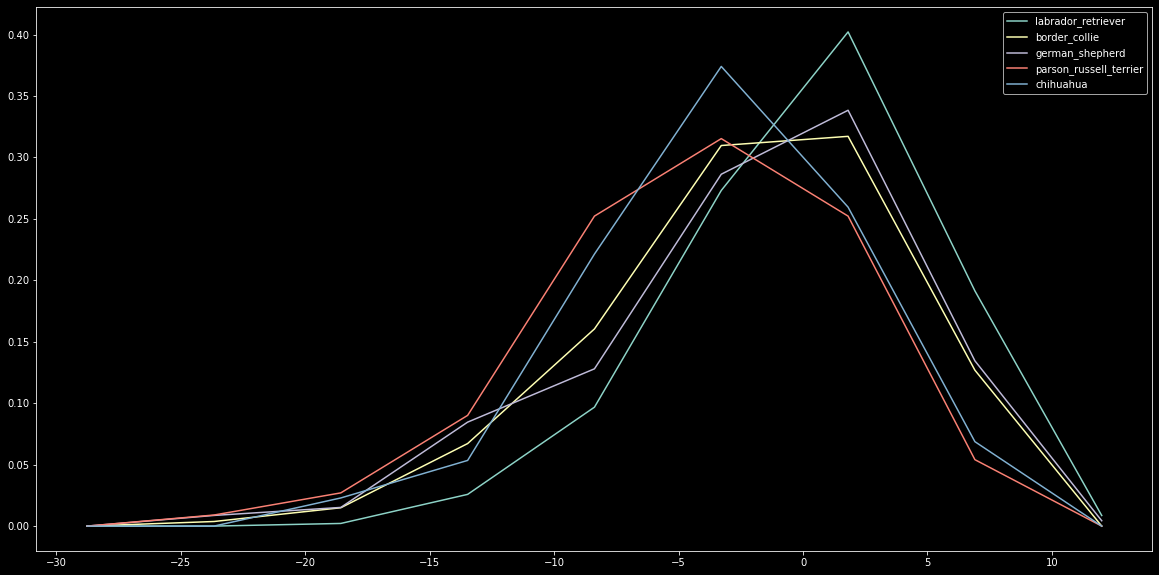

In [15]:
# plot histograms of unexpected scores
plt.figure(figsize=(20, 10))
# find the right bins based on all the data
data = df["unexpected_score"]
bins = np.linspace(np.min(data), np.max(data), 10)

for breed in ["labrador_retriever", "border_collie", "german_shepherd", "parson_russell_terrier", "chihuahua"]:
    data = df[df["Breed"] == breed]["unexpected_score"]
    counts = np.histogram(data, bins=bins)[0]
    counts = counts / np.sum(counts)
    plt.plot(bins[:-1], counts, label=breed)
    # plt.hist(data, bins=bins, label=breed, density=True, histtype='step')
plt.legend(loc='upper right')
plt.show()

In [91]:
x = df[df["Breed"] == "german_wirehaired_pointer"]["unexpected_score"]
# type(x)
x

317      -4.208234
1500      4.296404
1684      5.183842
1899      1.145537
2712     -0.481704
2717      2.099092
3400     -0.142576
3484     11.969573
3850      4.984523
3979      5.387693
3980      1.470435
4133     -7.770682
4444      2.524200
4956      2.496661
5221     -5.329172
5336      4.954742
5662      5.618294
6378      7.199264
8090      8.904238
8189      1.111216
8199      5.944073
9376     -1.158073
9949      6.708951
10156     8.199569
10173     9.696109
10245    -6.865866
10247     6.861667
10287     8.949237
10322     4.703872
10330    -0.305312
10379     3.567002
10500   -11.423446
10644     8.167660
10731     8.816166
10738     3.617566
10752     9.353215
10753     5.635748
10756     4.965499
10809     5.555525
10872    -0.723223
10887    -6.249679
10925     5.255284
10992     8.953383
11286    -2.176277
11655    -0.952524
11736     6.387880
11760     2.705213
11767     1.154486
13300    -0.621521
Name: unexpected_score, dtype: float64

In [23]:
xls = pd.ExcelFile('data/health.xlsx')
df_health = pd.read_excel(xls, 'All_Dogs')

In [46]:
df_health.sort_values("Morbidity (Dog Years at Risk)")

,Breed,Count,Heterozygosity minimum,Heterozygosity median,Heterozygosity maximum,Mid range body weight (kg),Fadj1,Unnamed: 7,Count For Insurance data,Morbidity (Dog Years at Risk),"Brachycephaly (Y=yes, N=no)",FCI Group
94,Finnish Spitz,162,21.400000,31.400000,39.200000,9.979032,0.285258,NaN,"5,000 < 10,000",794.000000,N,5.0
154,Norrbottenspitz,177,33.700000,40.700000,44.900000,11.339809,0.089679,NaN,"2,500 < 5,000",909.000000,N,5.0
155,"Norwegian Elkhound, Grey",818,23.500000,30.800000,39.700000,23.360007,0.297876,NaN,"10,000 < 15,000",1020.000000,N,5.0
101,German Spitz,50,26.700000,37.700000,43.000000,11.339809,0.152769,NaN,"1,000 < 2,500",1054.000000,N,5.0
122,Karelian Bear Dog,325,30.200000,35.900000,44.300000,21.545638,0.190623,NaN,"2,500 < 5,000",1138.000000,N,5.0
207,Swedish Elkhound,41,30.700000,34.900000,39.300000,26.081561,0.211653,NaN,"25,000 < 50,000",1155.000000,N,5.0
222,West-Siberian Laika,32,33.400000,39.200000,44.700000,21.545638,0.121224,NaN,"2,500 < 5,000",1162.000000,N,5.0
82,East-Siberian Laika,138,29.100000,38.000000,45.100000,26.081561,0.146460,NaN,"2,500 < 5,000",1162.000000,N,5.0
50,Brittany,65,18.500000,34.000000,40.300000,15.875733,0.230580,0.2630,1000-2500,1179.000000,N,7.0
175,Puli,36,31.400000,38.500000,41.800000,13.607771,0.135945,NaN,"1,000 < 2,500",1188.000000,N,1.0
